<a href="https://colab.research.google.com/github/aciuffolini/App_Cria_Report/blob/main/Sorting_Clasificacion_de_GIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
# Step 1: Install Roboflow
!pip install roboflow

# Step 2: Import necessary libraries
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FdcPI0dcLxU6OLJJaMK6")
project = rf.workspace("atilio-ciuffolini-uzcrh").project("ecografias-de-aob")
version = project.version(6)
dataset = version.download("multiclass")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn


# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)


In [ ]:
import os
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define the paths
base_dir = '/content/Ecografías-de-AOB-6/train/'
images_dir_path = os.path.join(base_dir, 'images')  # Assuming images are stored in 'images' subdirectory
labels_file_path = '/content/modified_classes.csv'  # Path to the modified CSV file

# Load the CSV file containing image filenames and marbling scores
df = pd.read_csv(labels_file_path)

# Define the Dataset class
class MarblingDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 'filename'])
        image = Image.open(img_name)
        label = self.dataframe.iloc[idx, 'marbling-score']  # Access the marbling score

        if self.transform:
            image = self.transform(image)

        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset and DataLoader setup
train_dataset = MarblingDataset(dataframe=df, image_dir=images_dir_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


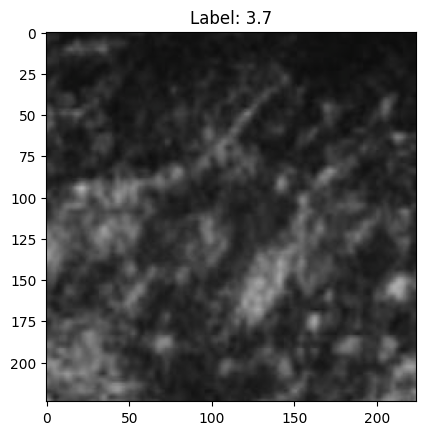

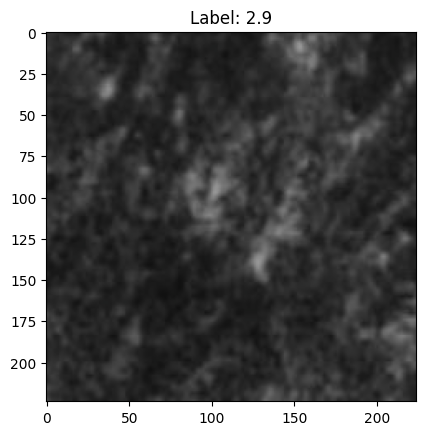

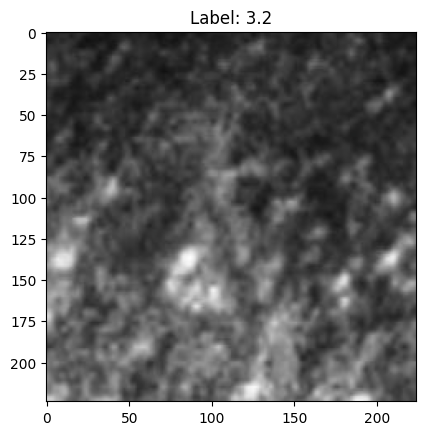

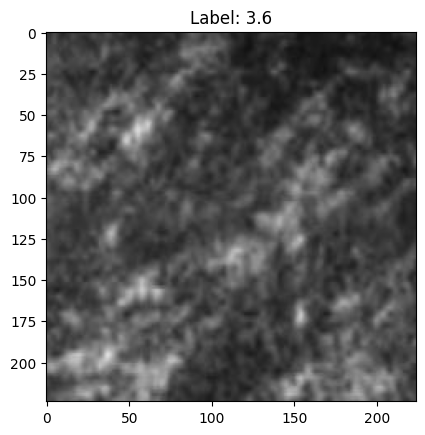

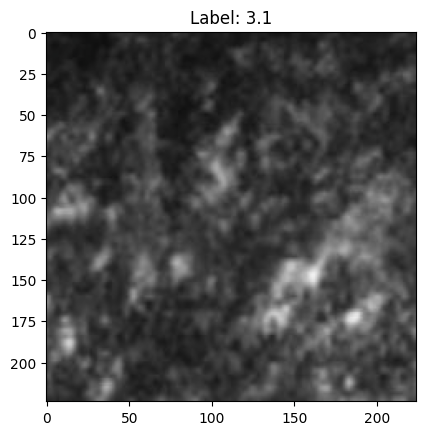

In [ ]:
import os
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Paths
base_dir = '/content/Ecografías-de-AOB-6/test'  # Adjust based on your directory structure
train_csv_path = '/content/modified_test_classes.csv'  # Use the modified CSV

# Load the CSV file
train_df = pd.read_csv(train_csv_path)

# Dataset class
class MarblingDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx]['filename'])
        image = Image.open(img_name)

        # Convert label to float
        label = float(self.dataframe.iloc[idx]['marbling-score'])

        if self.transform:
            image = self.transform(image)

        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the training dataset
train_dataset = MarblingDataset(train_df, base_dir, transform=transform)

# Check the first few samples
num_samples_to_display = 5
for i in range(num_samples_to_display):
    image, label = train_dataset[i]
    image_np = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_np = std * image_np + mean
    image_np = np.clip(image_np, 0, 1)

    plt.imshow(image_np)
    plt.title(f'Label: {label}')
    plt.show()


In [ ]:
# Inspect the first few rows of the training and testing data
print(train_df.head())
print(test_df.head())

# Check for NaN values in the datasets
print("Training data contains NaN:", train_df.isnull().values.any())
print("Testing data contains NaN:", test_df.isnull().values.any())

# Check for any unusually large values that might indicate a problem
print("Training label stats:")
print(train_df['marbling-score'].describe())

print("Testing label stats:")
print(test_df['marbling-score'].describe())




                                            filename  marbling-score
0  0948_jpeg.rf.bd15b2bbd9145597ebae7cc01613ee42.jpg             3.7
1  1163_jpeg.rf.6a2376848d2ee673fbec0d9b67ef778b.jpg             2.9
2  1165_jpeg.rf.650c0d929603b283e1a53f5233c8498c.jpg             3.2
3  3720_jpeg.rf.66553e6b67b91b6173fe8351c750fa65.jpg             3.6
4  1160_jpeg.rf.44b8c8a1d45d72a7936b4b25bd60a198.jpg             3.1
                                            filename  marbling-score
0  0948_jpeg.rf.bd15b2bbd9145597ebae7cc01613ee42.jpg             3.7
1  1163_jpeg.rf.6a2376848d2ee673fbec0d9b67ef778b.jpg             2.9
2  1165_jpeg.rf.650c0d929603b283e1a53f5233c8498c.jpg             3.2
3  3720_jpeg.rf.66553e6b67b91b6173fe8351c750fa65.jpg             3.6
4  1160_jpeg.rf.44b8c8a1d45d72a7936b4b25bd60a198.jpg             3.1
Training data contains NaN: False
Testing data contains NaN: False
Training label stats:
count    7.000000
mean     3.257143
std      0.386683
min      2.700000
25%      3.

In [ ]:
import pandas as pd

# Load the CSV file
train_csv_path = '/content/modified_classes.csv'  # Update this path to the actual location of your file
train_df = pd.read_csv(train_csv_path)

# Remove rows with NaN values in the training data
train_df_cleaned = train_df.dropna().reset_index(drop=True)

# Save the cleaned DataFrame to a new CSV file
cleaned_csv_path = '/content/modified_classes_cleaned.csv'  # Update this path to where you want to save the cleaned file
train_df_cleaned.to_csv(cleaned_csv_path, index=False)

# Check if the DataFrame still contains any NaN values
nan_present = train_df_cleaned.isnull().any().any()

print("Training data contains NaN after cleaning:", nan_present)
print("Cleaned data saved to:", cleaned_csv_path)
print(train_df_cleaned.head())


Training data contains NaN after cleaning: False
Cleaned data saved to: /content/modified_classes_cleaned.csv
                                            filename  marbling-score
0  1271_jpeg.rf.1d2f4e1a51136637379527201a354c7d.jpg             4.2
1  1227_jpeg.rf.0055f560ff6e11cc6fc463c7bd993875.jpg             3.1
2  0922_jpeg.rf.218f38fd1ed6c2909850d1ea75ab86c1.jpg             3.8
3  3708_jpeg.rf.1d42309a4aab2d5761a5dc1291fecd7d.jpg             3.5
4  4320_jpeg.rf.1a1003eeecdb3341e7687351aeb578fe.jpg             3.7


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image
import os

def compute_accuracy_within_threshold(outputs, labels, threshold=0.1):
    absolute_errors = torch.abs(outputs - labels)
    allowable_error = threshold * torch.abs(labels)
    correct_predictions = absolute_errors <= allowable_error
    accuracy = torch.mean(correct_predictions.float()) * 100  # percentage
    return accuracy.item()

# Define the paths for training and test data
base_dir = '/content/Ecografías-de-AOB-6'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Paths to the modified CSV files
train_csv_path = '/content/modified_classes_cleaned.csv'
test_csv_path = '/content/modified_test_classes.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

class MarblingDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx]['filename'])
        image = Image.open(img_name)
        label = float(self.dataframe.iloc[idx]['marbling-score'])
        if self.transform:
            image = self.transform(image)
        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the training and test datasets
train_dataset = MarblingDataset(train_df, train_dir, transform=transform)
test_dataset = MarblingDataset(test_df, test_dir, transform=transform)

# Create the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model architecture
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

# Set up the training environment
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_mae = 0.0
    total = 0
    accuracy_within_threshold = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_mae += torch.sum(torch.abs(outputs - labels)).item()
        accuracy_within_threshold += compute_accuracy_within_threshold(outputs, labels)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_mae = running_mae / total
    epoch_accuracy = accuracy_within_threshold / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} Train Loss: {epoch_loss:.4f}, Train MAE: {epoch_mae:.4f}, Train Accuracy within 10%: {epoch_accuracy:.2f}%')

# Evaluation
model.eval()
test_loss = 0.0
test_mae = 0.0
total = 0
accuracy_within_threshold = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        test_mae += torch.sum(torch.abs(outputs - labels)).item()
        accuracy_within_threshold += compute_accuracy_within_threshold(outputs, labels)
        total += labels.size(0)

test_loss /= total
test_mae /= total
test_accuracy = accuracy_within_threshold / len(test_loader)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}, Test Accuracy within 10%: {test_accuracy:.2f}%')

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1/15 Train Loss: 9.5886, Train MAE: 2.8318, Train Accuracy within 10%: 2.34%
Epoch 2/15 Train Loss: 1.5155, Train MAE: 0.9854, Train Accuracy within 10%: 25.00%
Epoch 3/15 Train Loss: 0.4395, Train MAE: 0.5157, Train Accuracy within 10%: 47.66%
Epoch 4/15 Train Loss: 0.1625, Train MAE: 0.3282, Train Accuracy within 10%: 57.81%
Epoch 5/15 Train Loss: 0.1241, Train MAE: 0.2670, Train Accuracy within 10%: 68.75%
Epoch 6/15 Train Loss: 0.0806, Train MAE: 0.2392, Train Accuracy within 10%: 80.47%
Epoch 7/15 Train Loss: 0.1315, Train MAE: 0.2979, Train Accuracy within 10%: 60.16%
Epoch 8/15 Train Loss: 0.1053, Train MAE: 0.2522, Train Accuracy within 10%: 63.28%
Epoch 9/15 Train Loss: 0.0909, Train MAE: 0.2218, Train Accuracy within 10%: 77.34%
Epoch 10/15 Train Loss: 0.0757, Train MAE: 0.2124, Train Accuracy within 10%: 85.16%
Epoch 11/15 Train Loss: 0.0568, Train MAE: 0.1889, Train Accuracy within 10%: 89.06%
Epoch 12/15 Train Loss: 0.0750, Train MAE: 0.2192, Train Accuracy within 10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image
import os

# Define the paths for training and test data
base_dir = '/content/Ecografías-de-AOB-6'
train_dir = os.path.join(base_dir, 'train')  # Assuming images are stored in 'images' subdirectory
test_dir = os.path.join(base_dir, 'test')  # Assuming images are stored in 'images' subdirectory

# Paths to the modified CSV files
train_csv_path = '/content/modified_classes_cleaned.csv'
test_csv_path = '/content/modified_test_classes.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

import os
from torch.utils.data import Dataset
from PIL import Image

class MarblingDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Ensure the column names exist in the dataframe
        if 'filename' not in self.dataframe.columns or 'marbling-score' not in self.dataframe.columns:
            raise KeyError("CSV does not contain required 'filename' or 'marbling-score' columns.")

        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx]['filename'])
        image = Image.open(img_name)

        # Convert label to float
        label = float(self.dataframe.iloc[idx]['marbling-score'])

        if self.transform:
            image = self.transform(image)

        return image, label


# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the training and test datasets
train_dataset = MarblingDataset(train_df, train_dir, transform=transform)
test_dataset = MarblingDataset(test_df, test_dir, transform=transform)

# Create the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model architecture
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Regression: only 1 output node

# Set up the training environment
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10  # Define the number of epochs

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_mae = 0.0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Regression label

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
         # Clip gradients to prevent explosion
        #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # Add gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_mae += torch.sum(torch.abs(outputs - labels)).item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_mae = running_mae / total
    print(f'Epoch {epoch+1}/{num_epochs} Train Loss: {epoch_loss:.4f}, Train MAE: {epoch_mae:.4f}')

# Evaluate the model using the test set
model.eval()
test_loss = 0.0
running_mae = 0.0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        running_mae += torch.sum(torch.abs(outputs - labels)).item()
        total += labels.size(0)

test_loss /= total
test_mae = running_mae / total
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')
def compute_accuracy_within_threshold(outputs, labels, threshold=0.1):
    absolute_errors = torch.abs(outputs - labels)
    allowable_error = threshold * torch.abs(labels)
    correct_predictions = absolute_errors <= allowable_error
    accuracy = torch.mean(correct_predictions.float()) * 100  # percentage
    return accuracy.item()

# Train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_mae = 0.0
    total = 0
    accuracy_within_threshold = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Regression label

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_mae += torch.sum(torch.abs(outputs - labels)).item()
        accuracy_within_threshold += compute_accuracy_within_threshold(outputs, labels)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_mae = running_mae / total
    epoch_accuracy = accuracy_within_threshold / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} Train Loss: {epoch_loss:.4f}, Train MAE: {epoch_mae:.4f}, Train Accuracy within 10%: {epoch_accuracy:.2f}%')

# Evaluate the model using the test set
model.eval()
test_loss = 0.0
test_mae = 0.0
total = 0
accuracy_within_threshold = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        test_mae += torch.sum(torch.abs(outputs - labels)).item()
        accuracy_within_threshold += compute_accuracy_within_threshold(outputs, labels)
        total += labels.size(0)

test_loss /= total
test_mae /= total
test_accuracy = accuracy_within_threshold / len(test_loader)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}, Test Accuracy within 10%: {test_accuracy:.2f}%')



The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1/10 Train Loss: 8.8662, Train MAE: 2.7416
Epoch 2/10 Train Loss: 2.1747, Train MAE: 1.1168
Epoch 3/10 Train Loss: 1.2189, Train MAE: 0.8495
Epoch 4/10 Train Loss: 0.2503, Train MAE: 0.4027
Epoch 5/10 Train Loss: 0.0982, Train MAE: 0.2520
Epoch 6/10 Train Loss: 0.1125, Train MAE: 0.2535
Epoch 7/10 Train Loss: 0.0609, Train MAE: 0.2009
Epoch 8/10 Train Loss: 0.0302, Train MAE: 0.1361
Epoch 9/10 Train Loss: 0.0751, Train MAE: 0.2206
Epoch 10/10 Train Loss: 0.0531, Train MAE: 0.1883
Test Loss: 0.3708, Test MAE: 0.4759
Epoch 1/10 Train Loss: 0.0692, Train MAE: 0.1992, Train Accuracy within 10%: 74.22%
Epoch 2/10 Train Loss: 0.0555, Train MAE: 0.1874, Train Accuracy within 10%: 80.47%
Epoch 3/10 Train Loss: 0.0519, Train MAE: 0.1814, Train Accuracy within 10%: 82.03%
Epoch 4/10 Train Loss: 0.0392, Train MAE: 0.1548, Train Accuracy within 10%: 88.28%
Epoch 5/10 Train Loss: 0.0336, Train MAE: 0.1477, Train Accuracy within 10%: 95.31%
Epoch 6/10 Train Loss: 0.0151, Train MAE: 0.1001, Tra

In [ ]:
!pip install matplotlib


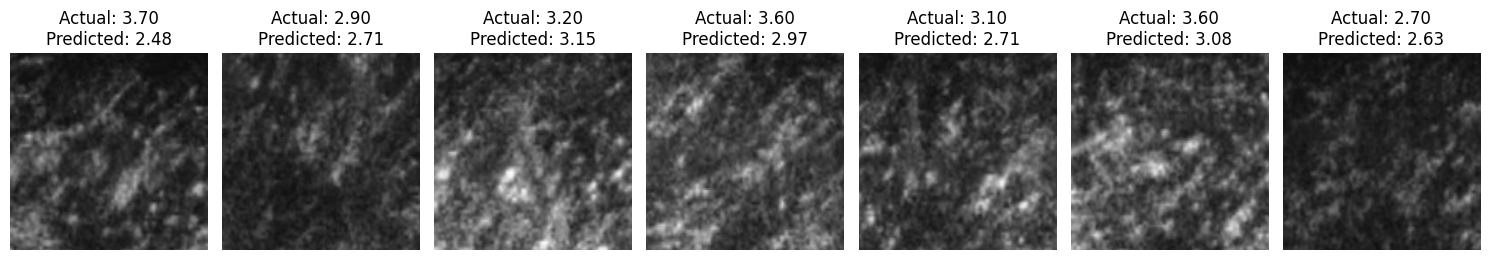

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Assuming mean and std are the normalization parameters used during the transform
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Number of images you want to show in a grid
num_images = 7
fig, axes = plt.subplots(1, num_images, figsize=(15, 4))

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        outputs = model(inputs)

        inputs = inputs.cpu()
        labels = labels.cpu()
        outputs = outputs.cpu()

        for i in range(min(num_images, inputs.size(0))):
            img = inputs[i].numpy().transpose((1, 2, 0))
            img = std * img + mean  # Unnormalize
            img = np.clip(img, 0, 1)
            actual_label = labels[i].item()
            predicted_label = outputs[i].item()

            axes[i].imshow(img)
            axes[i].set_title(f'Actual: {actual_label:.2f}\nPredicted: {predicted_label:.2f}')
            axes[i].axis('off')

        break  # Only show the first batch

plt.tight_layout()
plt.show()
